# Plotting Data

In this notebook we are going to profile the data graphically consuming the results obtained in the notebook [Data Preparation](Data Preparation.ipynb) where the raw data has been transformed to consistent datasets with standard column names, with daily information grouped and the null cells has been processed accordingly. In addition, technical indicators has been added to the closing price of each day. In this notebook we are going to explore the distributions of the daily returns and their correlation among the datasets. Also graphicaly we are going to plot each dataset with the technical indicators to extract some conclusions. Finally we are to build a function to plot a dataset with the the regular candle stick and the Heikin-Ashi candlesticks.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from collections import namedtuple
import seaborn as sns
from datetime import datetime
from IPython.display import display, HTML
import matplotlib.dates as mdates
from pandas.plotting import scatter_matrix

from matplotlib.finance import candlestick_ohlc
%matplotlib inline



/Users/JR/anaconda3/envs/pyfinance/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Decorator cycles

In [17]:
def all_datasets(func,datasets ,start_date,end_date):
    for key,dataset in datasets.items():
        func(dataset,start_date,end_date,key)
    
           

## Import data object

In [4]:
Dataset=namedtuple('Dataset','exchange df')
with open('datasets/datasets.pkl', 'rb') as input1:
    datasets = pickle.load(input1)
with open('datasets/log_datasets.pkl', 'rb') as input2:
    log_datasets = pickle.load(input2)
with open('datasets/rescaled_datasets.pkl', 'rb') as input3:
    rescaled_datasets = pickle.load(input3)   

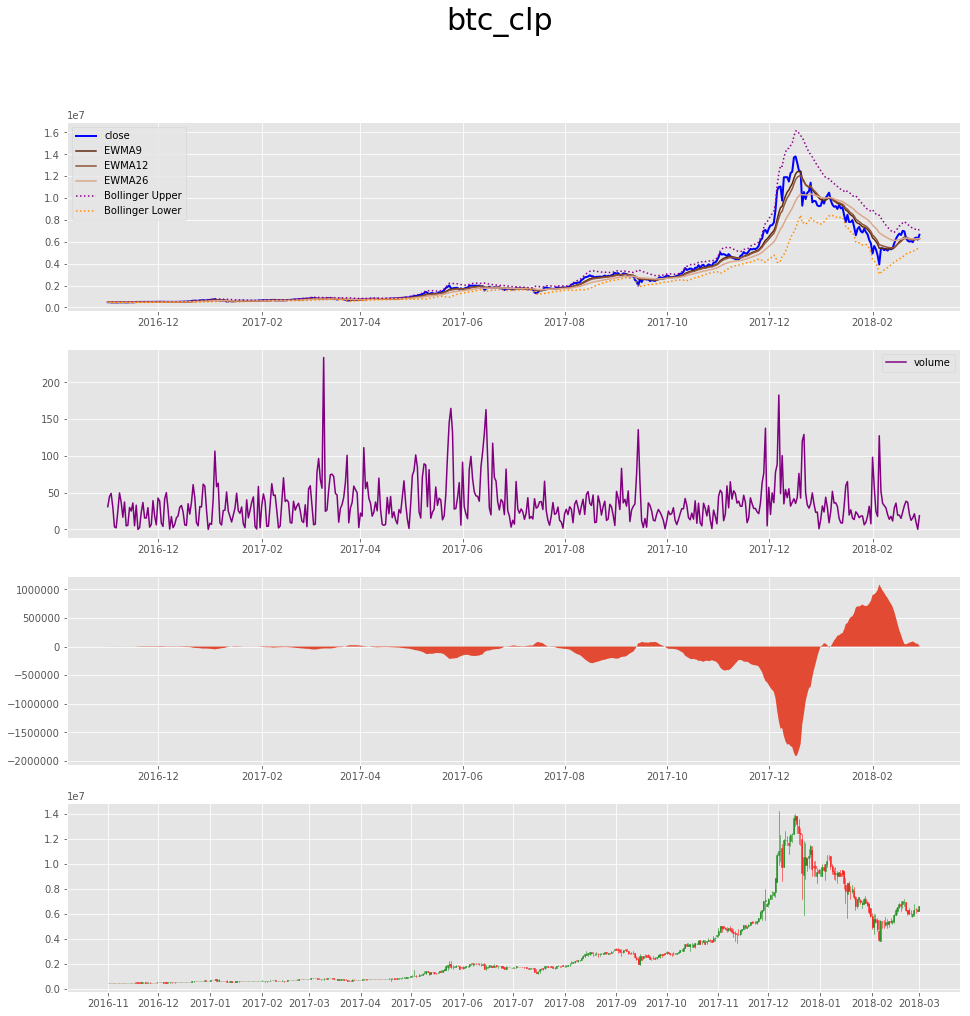

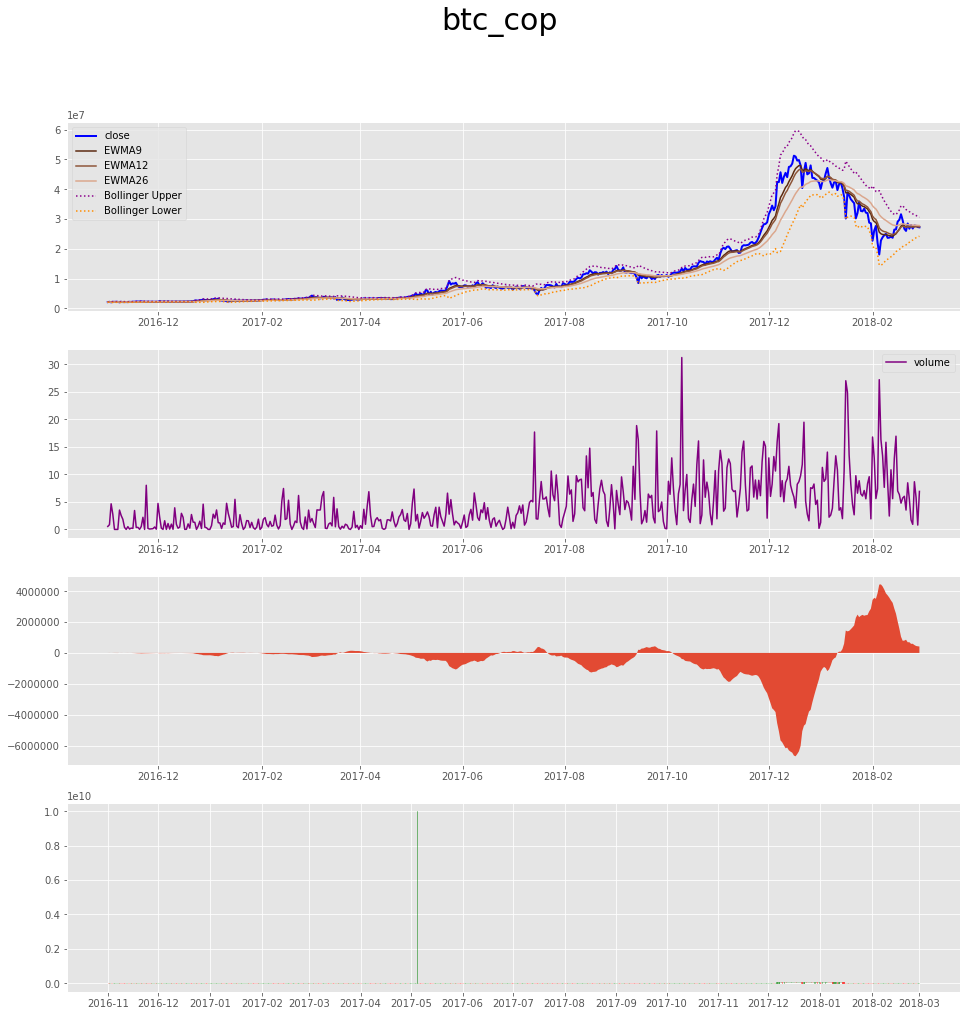

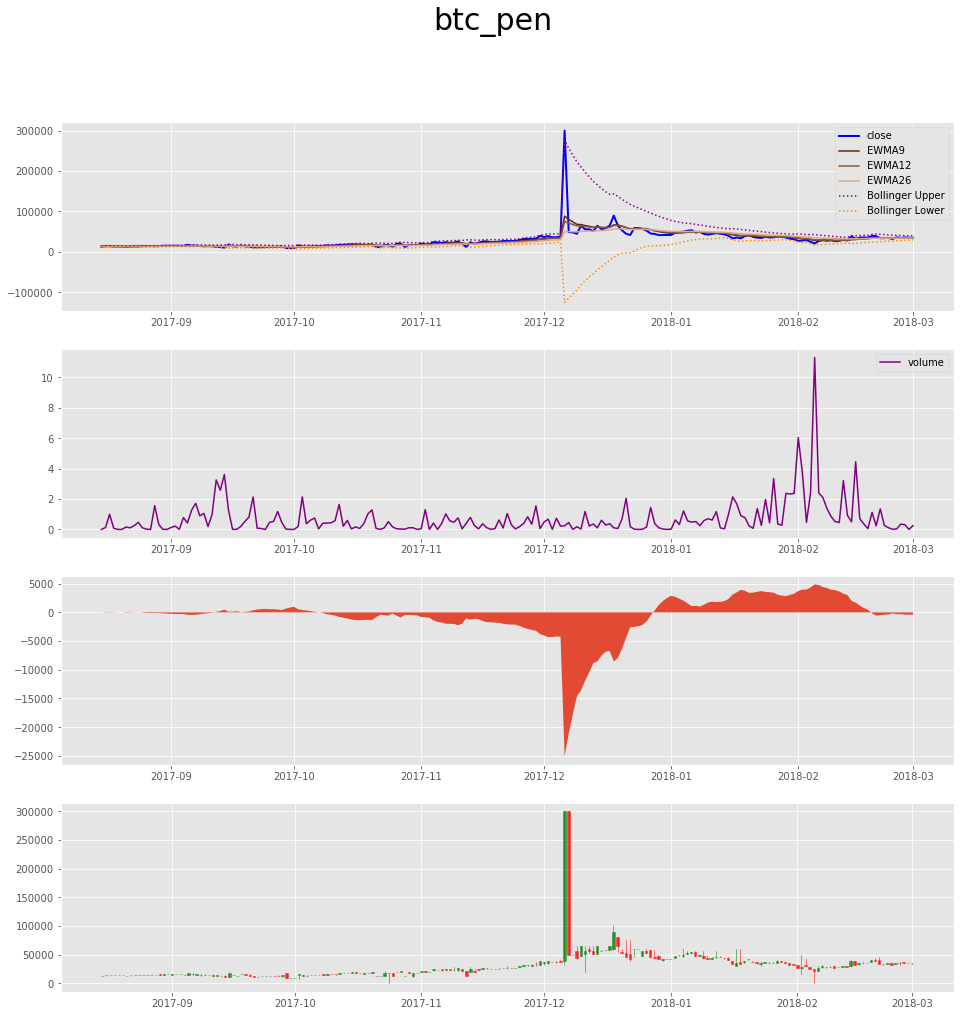

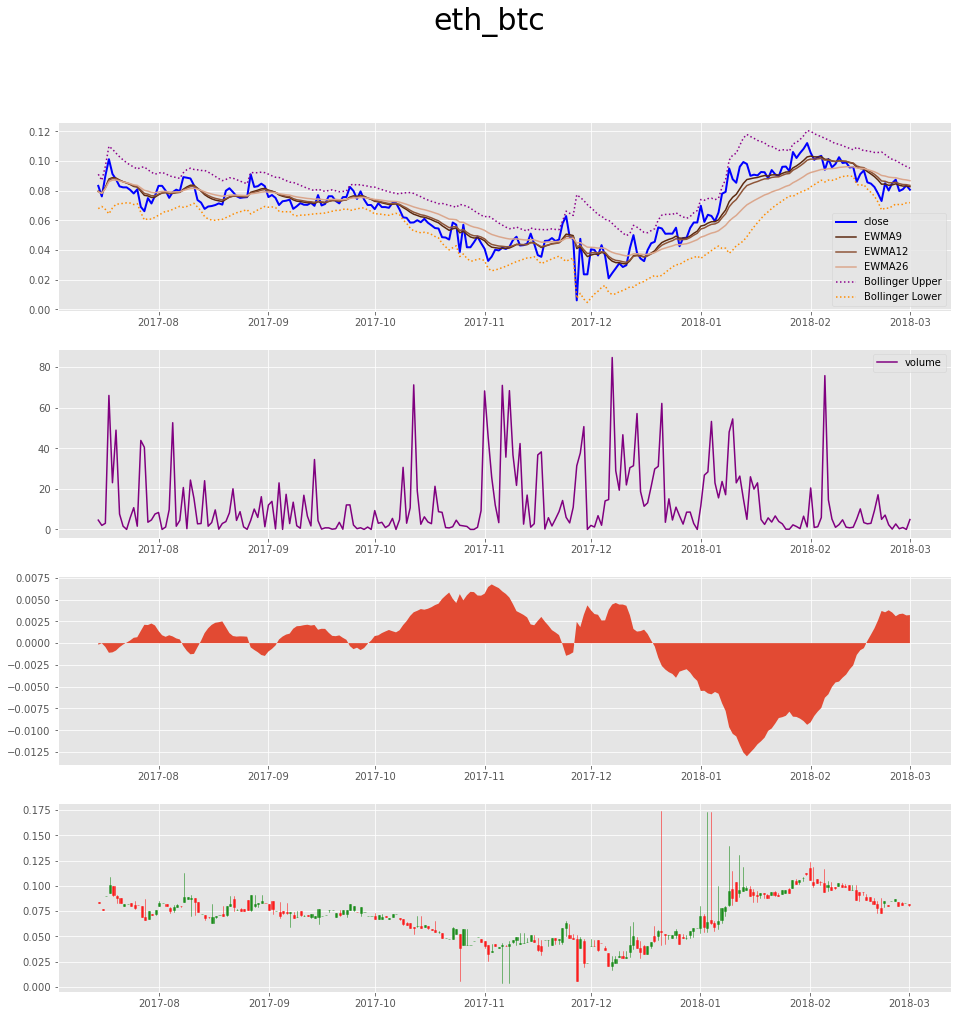

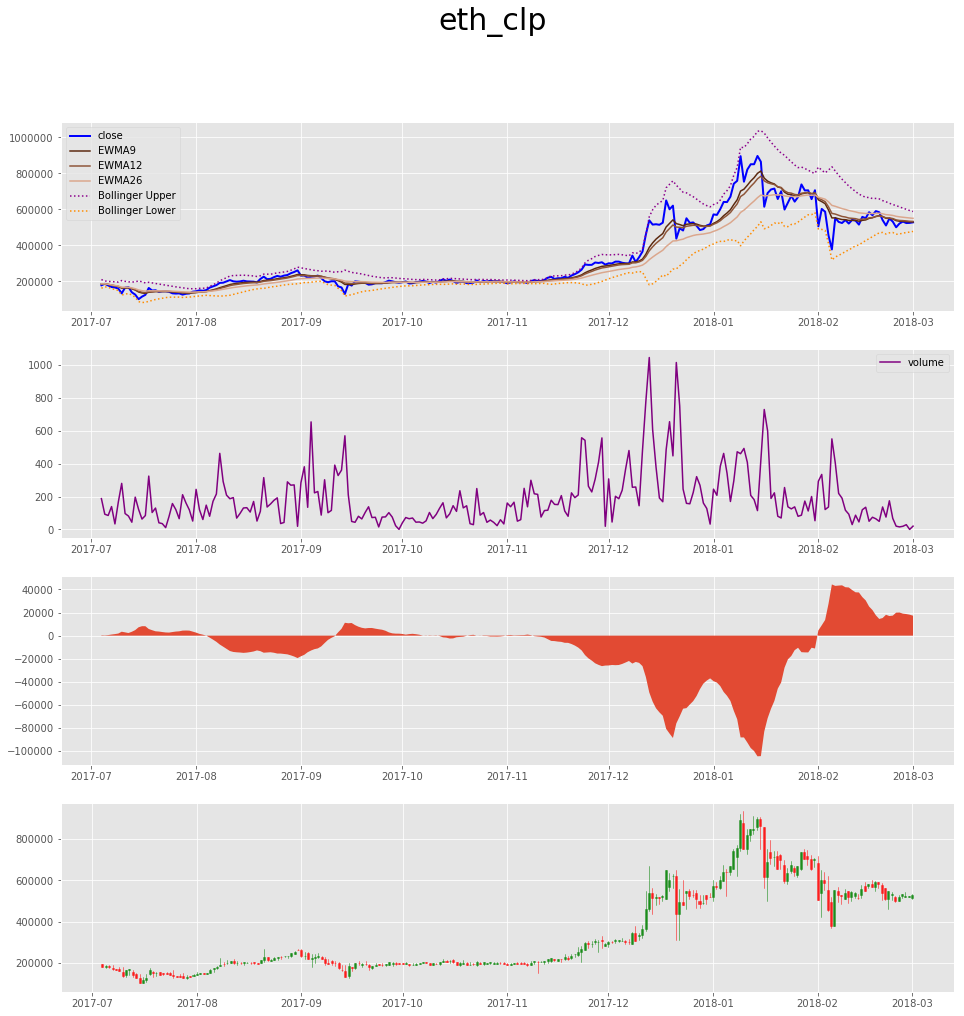

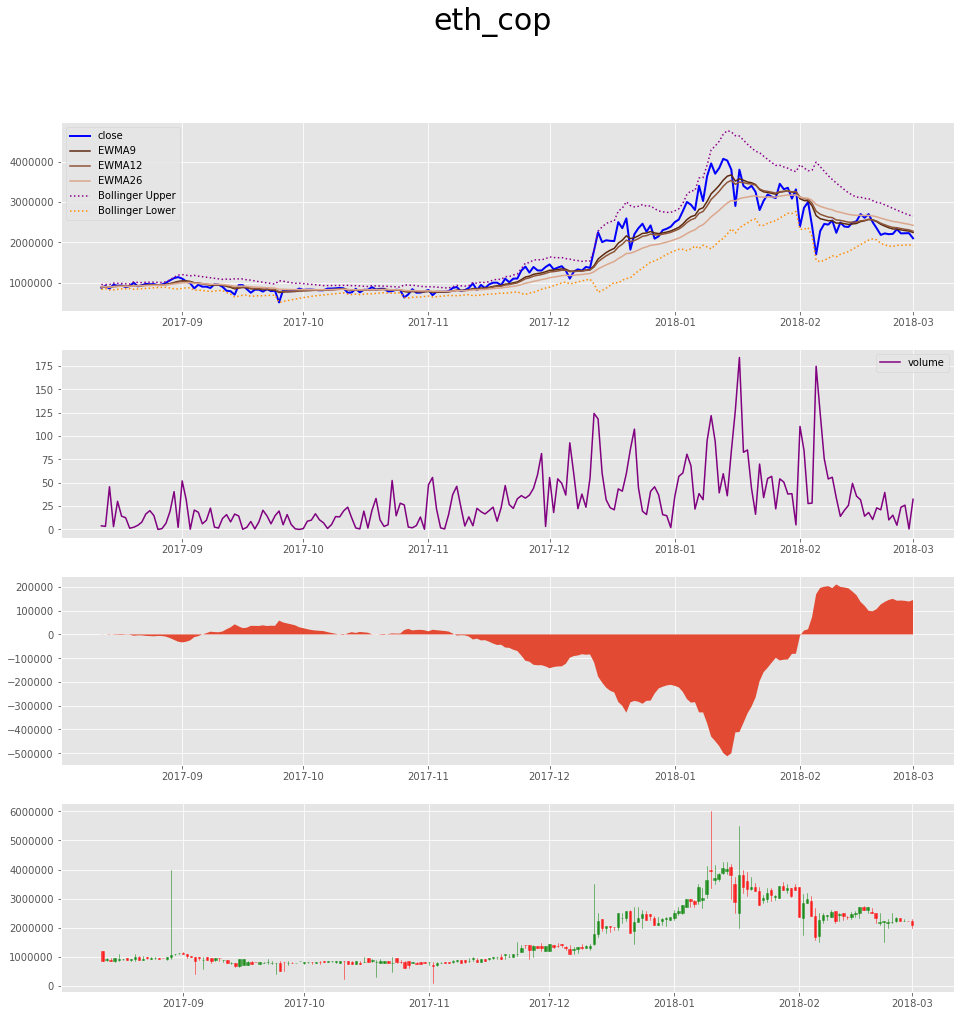

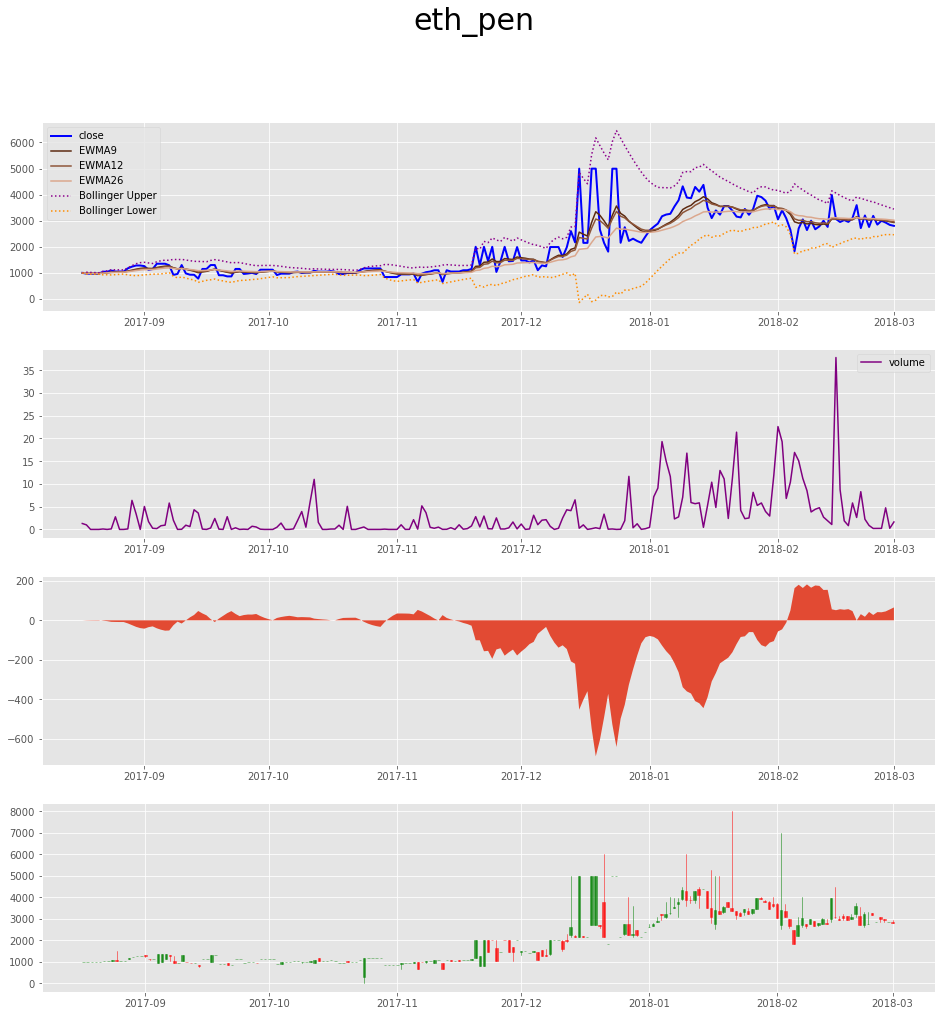

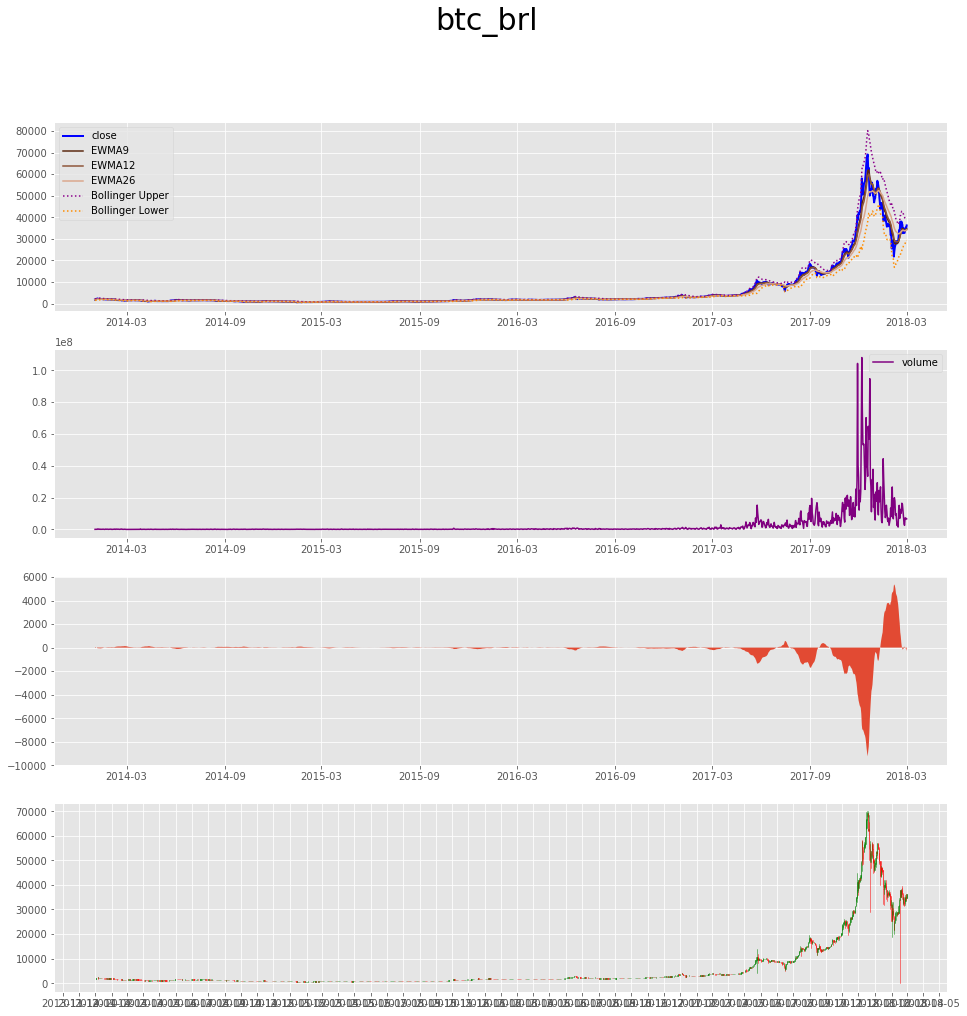

In [5]:
def plot_technical_indicators(dataset, start_date, end_date,key ):
    
    fig, (axes_technical,axes_volume,axes_macd,axes_ohlc ) = plt.subplots(4, 1, figsize=(16, 16))
    fig.suptitle(key,fontsize=30)
    axes_technical.plot(dataset.df.loc[start_date:end_date]['close'],linewidth=2.00,color="blue")
    axes_technical.plot(dataset.df.loc[start_date:end_date]['EWMA9'], color='#5B290F')
    axes_technical.plot(dataset.df.loc[start_date:end_date]['EWMA12'],color='#8E5538')
    axes_technical.plot(dataset.df.loc[start_date:end_date]['EWMA26'],color='#DBA78D')
    axes_technical.plot(dataset.df.loc[start_date:end_date]['Bollinger Upper'],ls=':',color="#8B008B")
    axes_technical.plot(dataset.df.loc[start_date:end_date]['Bollinger Lower'],ls=':',color="#FF8C00")
    axes_technical.legend()
    axes_technical.grid(True)
    
    axes_volume.plot(dataset.df.loc[start_date:end_date]['volume'],color='purple')
    axes_volume.legend() 
    axes_volume.grid(True)
    
    #axes[2].plot(dataset.df.loc[start_date:end_date]['MACD'],color='black',marker='*')
    # https://matplotlib.org/examples/pylab_examples/fill_between_demo.html
    axes_macd.fill_between(dataset.df.loc[start_date:end_date].index,0,dataset.df.loc[start_date:end_date]['MACD'])
    axes_macd.grid(True)
   
    quotes=dataset.df[['open','high','low','close']][start_date:end_date]
    quotes =quotes.reset_index()
    quotes['datetime'] = quotes['datetime'].map(mdates.date2num)
    monthFormatter = mdates.DateFormatter('%Y-%m')
    allMonths= mdates.MonthLocator()
    axes_ohlc.xaxis.set_major_locator(allMonths)
    axes_ohlc.xaxis.set_major_formatter(monthFormatter)
    candlestick_ohlc(axes_ohlc,quotes.values,width=0.6, colorup='g', colordown='r',alpha=0.75)
    axes_ohlc.grid(True)
    
    
start_date = datetime(2014,1,1)
end_date= datetime(2018,3,1)

all_datasets(plot_technical_indicators,datasets,start_date,end_date)

purple 1 :
purple 0.5 -.
purple 2 -
red 3 :
blue 3 -
blue 2 :
blue 1 -.
purple 3 --


/Users/JR/anaconda3/envs/pyfinance/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


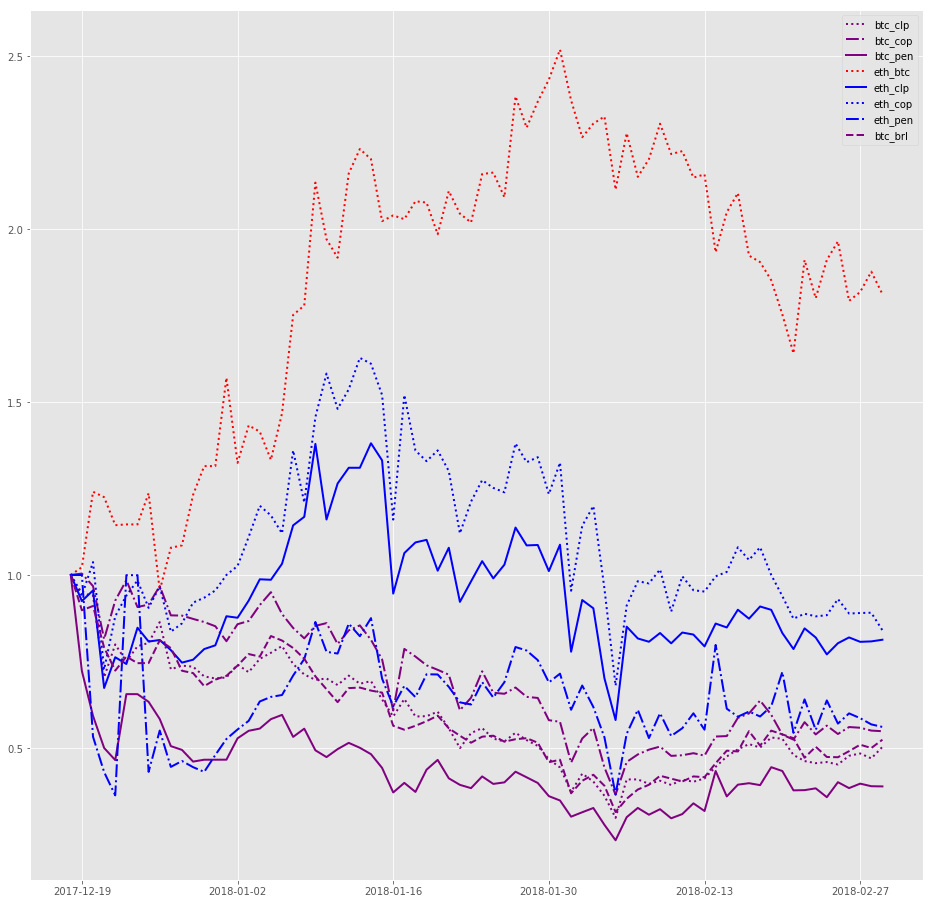

In [6]:
def plot_column_scaled(datasets, start_date, end_date,column='close' ):
    fig, axes = plt.subplots(figsize=(16, 16))
    for key,dataset in datasets.items(): 
        color,lw,ls =plot_settings(key)
        print(color,lw,ls)
        axes.plot(dataset.df.loc[start_date:end_date][column],
                 linewidth=2.00,
                 label=key,
                 color=color,
                 ls=ls,
                 lw=lw)
    axes.legend()

def plot_settings(key):
    plot_style={'eth_btc':('red',3,':',),
                'btc_cop':('purple',0.5,'-.'),
                'btc_clp':('purple',1,':'),
                'btc_pen':('purple',2,'-'),
                'btc_brl':('purple',3,'--'),
                'eth_pen':('blue',1,'-.'),
                'eth_cop':('blue',2,':'),
                'eth_clp':('blue',3,'-')}
    return  plot_style[key]
        
    
start_date = datetime(2017,12,18)
end_date= datetime(2018,3,1)        
plot_column_scaled(rescaled_datasets,start_date,end_date)  
    
   

In [7]:
def return_dataset(datasets):
    datasets_return=[dataset.df['Returns'] for dataset in datasets.values()]
    dataset_column_names=datasets.keys()
    return pd.concat(datasets_return,axis=1,keys=dataset_column_names)
        
return_dataset=return_dataset(datasets)

In [8]:
return_dataset

,btc_clp,btc_cop,btc_pen,eth_btc,eth_clp,eth_cop,eth_pen,btc_brl
datetime,,,,,,,,
2013-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015094
2013-06-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.070632
2013-06-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.015960
2013-06-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.024349
2013-06-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011746
2013-06-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.031534
2013-06-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011407
2013-06-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034615
2013-06-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003717


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11027deb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1f8a7a58>]], dtype=object)

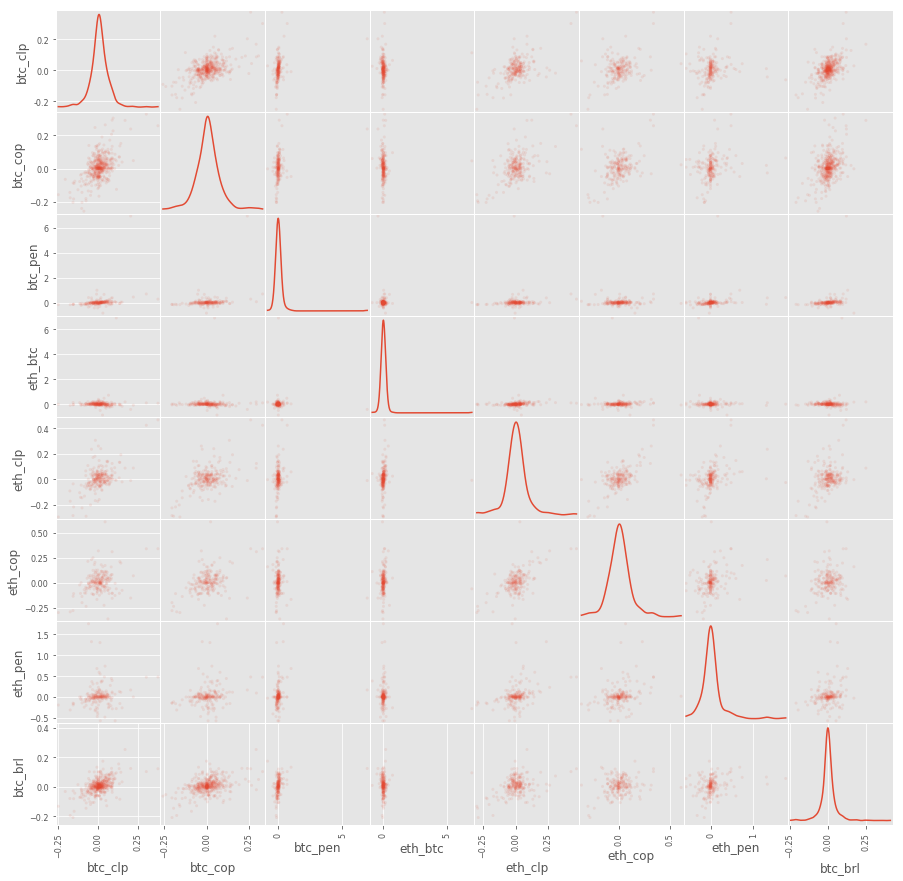

In [9]:
scatter_matrix(return_dataset,alpha=0.1,figsize=(15,15),diagonal = 'kde')

In [10]:
def get_comparing_datasets(datasets,column='log_return'):
    datasets_return=[dataset.df[column] for dataset in datasets.values()]
    dataset_column_names=datasets.keys()
    return pd.concat(datasets_return,axis=1,keys=dataset_column_names)
        
log_return_dataset=get_comparing_datasets(datasets)



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1fe87588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1117d2b38>]], dtype=object)

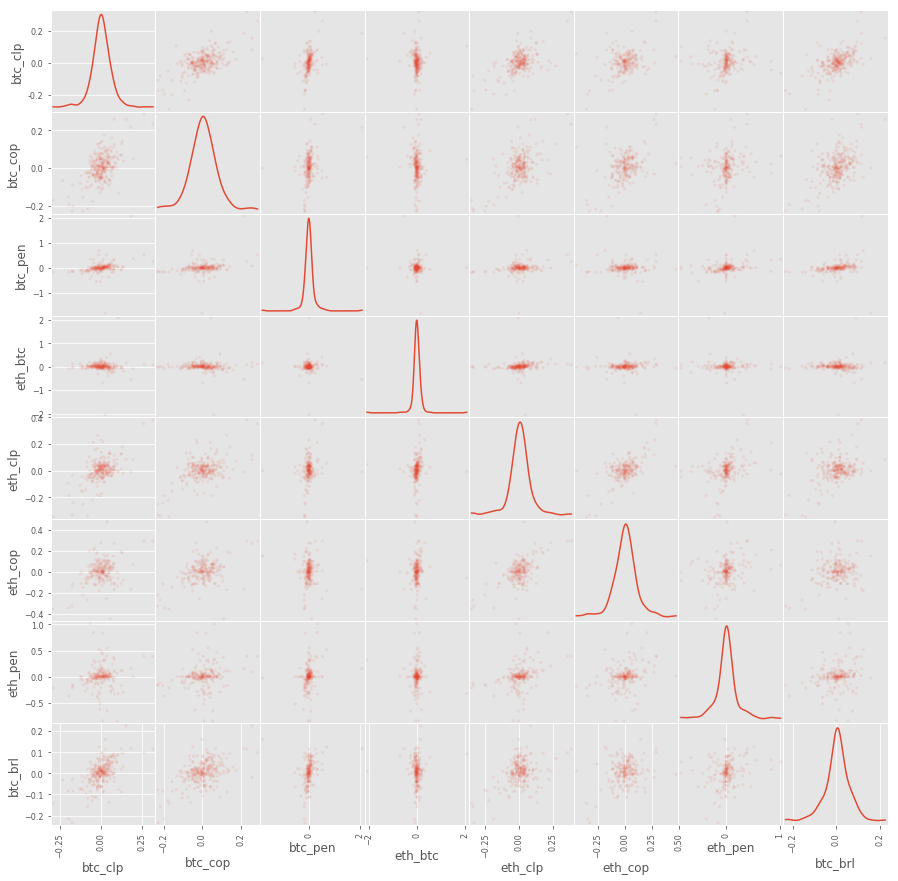

In [11]:
scatter_matrix(log_return_dataset[:]["2017-6-1":],alpha=0.1,figsize=(15,15), diagonal = 'kde')

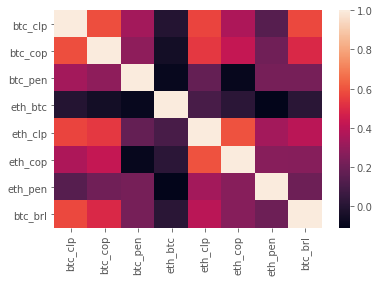

In [12]:
import seaborn as sns;
ax = sns.heatmap(log_return_dataset[:]["2017-6-1":].corr(method='pearson'))

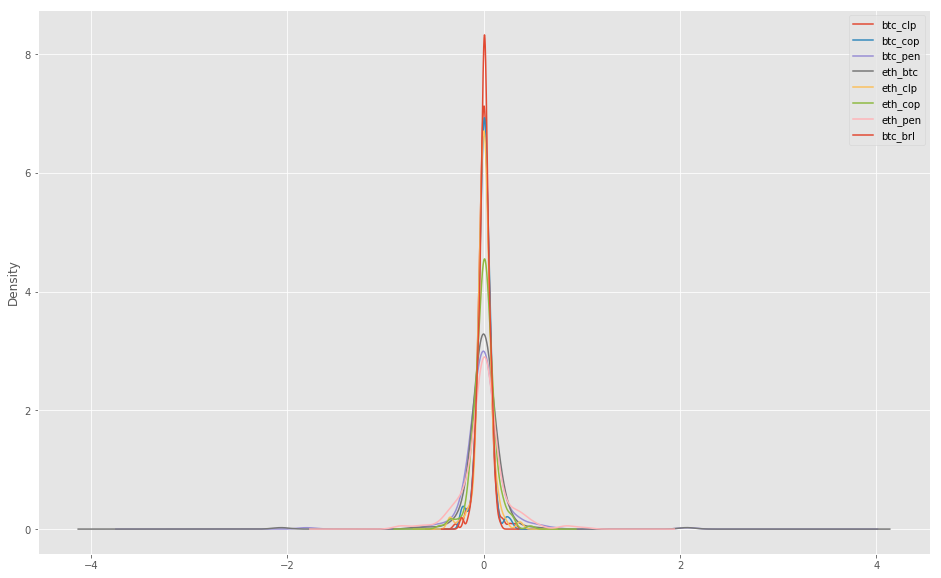

In [13]:
log_return_dataset[:]["2017-9-1":].plot.density(figsize=(16,10))

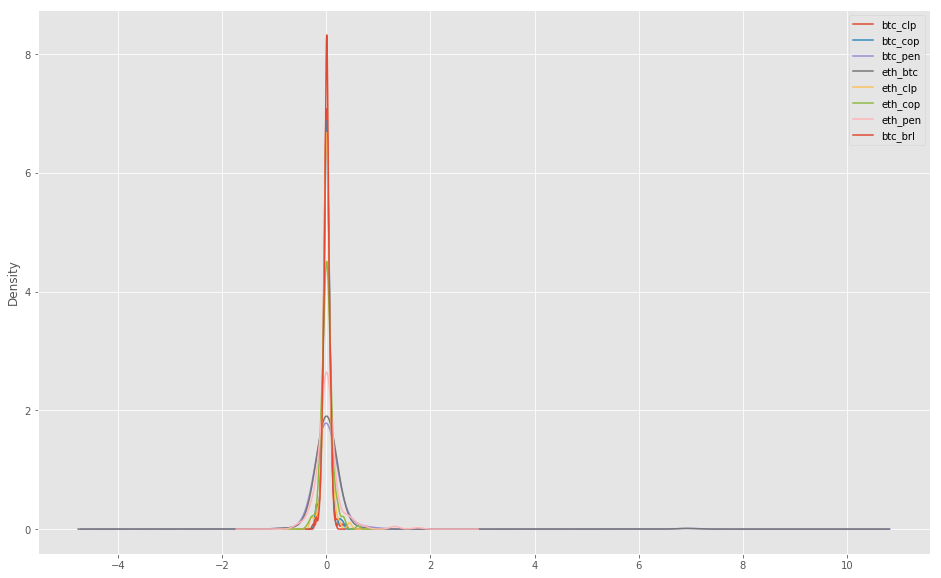

In [14]:
return_dataset[:]["2017-9-1":].plot.density(figsize=(16,10))

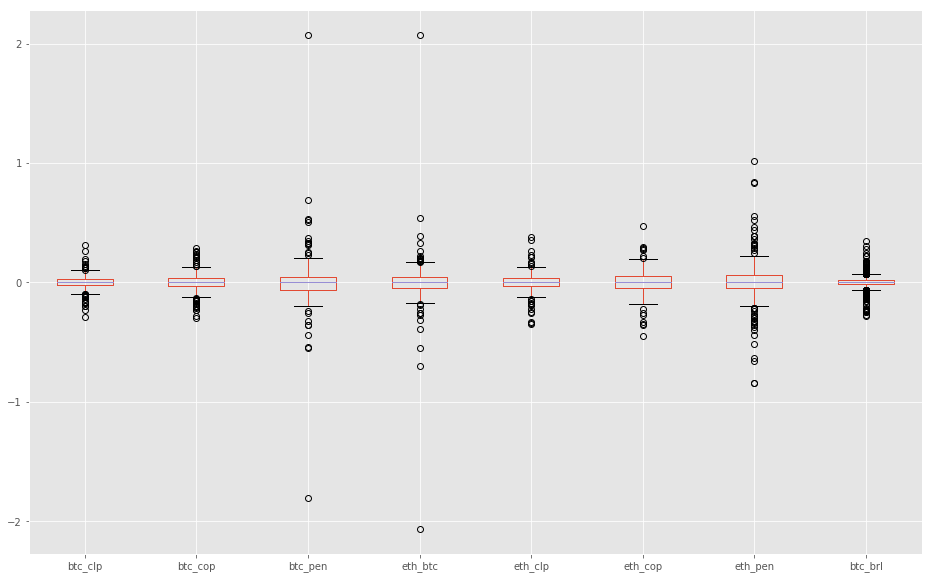

In [15]:
log_return_dataset.boxplot(figsize=(16,10))

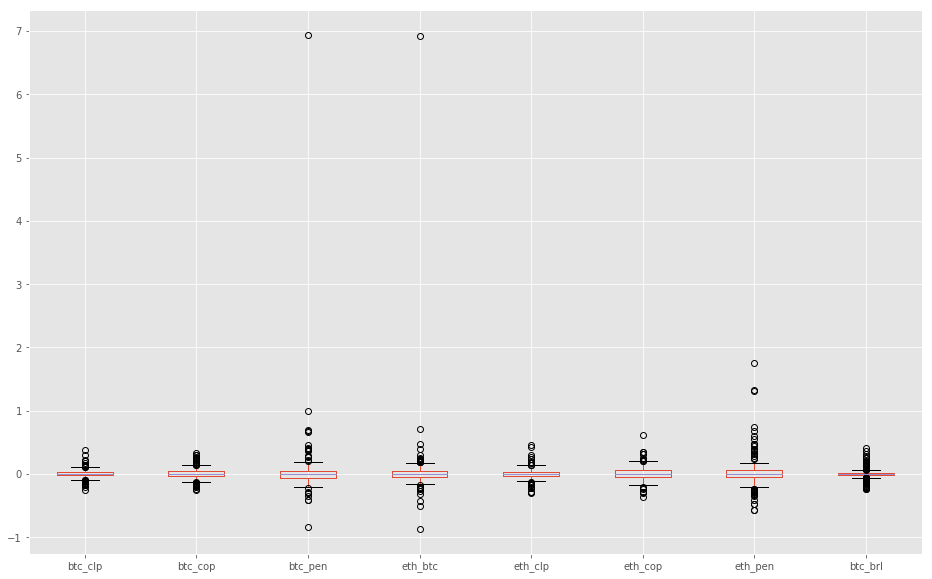

In [16]:
return_dataset.boxplot(figsize=(16,10))